In [1]:
import numpy as np
import pickle
from matplotlib import pyplot as plt

In [2]:
nparam=6

In [3]:
# set file name for POD basis
file_name_POD='./model/POD_v2_nparam_{}.p'.format(nparam)

# set file name for snapshot
file_name_snapshot="./data/snapshot_full_nparam_{}.p".format(nparam)

In [4]:
# load solution snapshot
solution_snapshot_orig = pickle.load(open(file_name_snapshot, "rb"))
nx=1001
nt=500

# substract IC -> centered on IC
ndata=solution_snapshot_orig.shape[0]
nset= round(ndata/(nt+1))

solution_snapshot=np.array([])
for foo in range(nset):
    solution_snapshot=np.append(solution_snapshot,solution_snapshot_orig[foo*(nt+1)+1:(foo+1)*(nt+1)]\
    -solution_snapshot_orig[foo*(nt+1)])

solution_snapshot=np.reshape(solution_snapshot,(-1,nx))

# remove BC
solution_snapshot = solution_snapshot[:,:-1]

solution_snapshot.shape

(3000, 1000)

In [5]:
U,S,VT=np.linalg.svd(solution_snapshot.T,full_matrices=False)

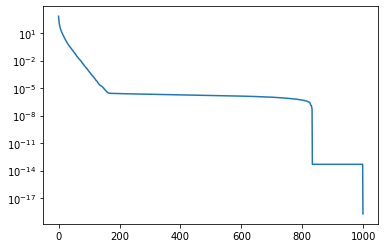

In [6]:
plt.figure()
plt.semilogy(S)
plt.show()

In [7]:
num_mode=5

acc=np.sum(S[:num_mode])/np.sum(S)*100
print(acc)

phi=U[:,:num_mode]

84.42218274911252


In [8]:
phi.shape

(1000, 5)

In [9]:
pickle.dump(phi,open(file_name_POD,'wb'))